# Econ 220 Final Project
## Introduction
### Motivation
### Importance

## Literature Review

## Data

## Group Members
- Jason
- Briana Yang
- Franklin Zhang
- Alexander Liu

## Referenced Links
- [Stacked Barplot (Python Graph Gallery)](https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/)
- https://stackoverflow.com/questions/44353516/get-keys-of-pandas-series-value-counts

In [243]:
%pip install seaborn --upgrade
%pip show seaborn

Note: you may need to restart the kernel to use updated packages.
Name: seabornNote: you may need to restart the kernel to use updated packages.

Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\alexa\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

In [245]:
data_path = "Data"

df = pd.read_csv(os.path.join(data_path,"usa_00002.csv.gz"))

In [246]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'SEX', 'AGE', 'RACE', 'RACED', 'EDUC', 'EDUCD',
       'VETSTAT', 'VETSTATD'],
      dtype='object')

In [247]:
df.index


RangeIndex(start=0, stop=3239553, step=1)

In [248]:
data = df[['AGE','EDUC','VETSTAT','VETSTATD','RACE','SEX']]

In [249]:
data

,AGE,EDUC,VETSTAT,VETSTATD,RACE,SEX
0,39,4,1,11,2,1
1,21,4,1,11,1,2
2,19,7,1,11,2,1
3,77,3,1,11,1,1
4,41,3,1,11,2,1
...,...,...,...,...,...,...
3239548,63,6,1,11,1,2
3239549,45,5,1,11,1,1
3239550,85,6,1,11,1,2
3239551,67,11,1,11,1,2


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239553 entries, 0 to 3239552
Data columns (total 6 columns):
 #   Column    Dtype
---  ------    -----
 0   AGE       int64
 1   EDUC      int64
 2   VETSTAT   int64
 3   VETSTATD  int64
 4   RACE      int64
 5   SEX       int64
dtypes: int64(6)
memory usage: 148.3 MB


## Data Cleaning and Preprocessing

In [251]:
data['AGE'].max() # Check if we have 999 missing code

96

In [252]:
data['EDUC'].value_counts()

EDUC
6     957679
10    507242
7     378171
11    320738
1     235229
8     217713
2     208489
0     189602
5      82793
4      74787
3      67110
Name: count, dtype: int64

In [253]:
data['VETSTAT'].value_counts()

VETSTAT
1    2433934
0     601405
2     204214
Name: count, dtype: int64

In [254]:
data['SEX'].value_counts()

SEX
2    1651221
1    1588332
Name: count, dtype: int64

In [255]:
data['RACE'].value_counts()

RACE
1    2501187
2     303874
6     129502
7     115099
8      90322
4      46070
3      33216
9      12193
5       8090
Name: count, dtype: int64

Text(0.5, 1.0, 'Age by VETSTAT Code before Pre-Processing')

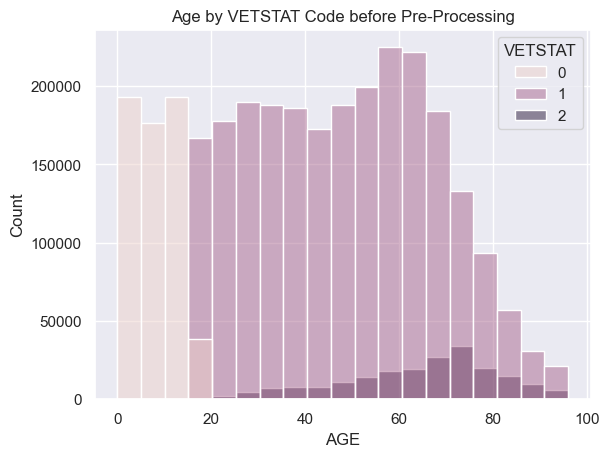

In [256]:
sns.histplot(data=data, x='AGE',hue='VETSTAT',binwidth=5).set_title("Age by VETSTAT Code before Pre-Processing")

### Vetstat codes
- 0: N/A
- 1: Not a veteran
- 2: Is a veteran
- 9: Unknown

In [257]:
# Remove VETSTAT codes 0 (N/A) and 9 (unknown)
data = data[~data['VETSTAT'].isin(set([0,9]))] # Remove people not qualified to serve as a veteran by AGE or other reasons

### Update VETSTAT codes
- 0: Not a veteran
- 1: Is a veteran

In [258]:
vetstat_conversion = {1:0, 2:1}
if 2 in data['VETSTAT'].values: # prevent double run
    data['VETSTAT'] = data['VETSTAT'].apply(lambda x: vetstat_conversion[x])
data['VETSTAT'].value_counts()

C:\Users\Alexa\AppData\Local\Temp\ipykernel_46816\1271933246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VETSTAT'] = data['VETSTAT'].apply(lambda x: vetstat_conversion[x])


VETSTAT
0    2433934
1     204214
Name: count, dtype: int64

<Axes: xlabel='VETSTAT', ylabel='count'>

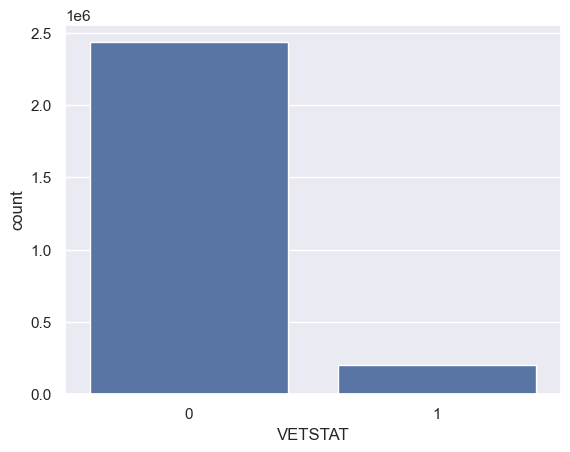

In [259]:
sns.countplot(data=data, x='VETSTAT')

### EDUC codes
- 00: N/A or no schooling
- 01: Nursery school to grade 4
- 02: Grade 5, 6, 7, or 8
- 03: Grade 9
- 04: Grade 10
- 05: Grade 11
- 06: Grade 12
- 07: 1 year of college
- 08: 2 years of college
- 09: 3 years of college
- 10: 4 years of college
- 11: 5+ years of college
- 99: Missing

<Axes: xlabel='EDUC', ylabel='count'>

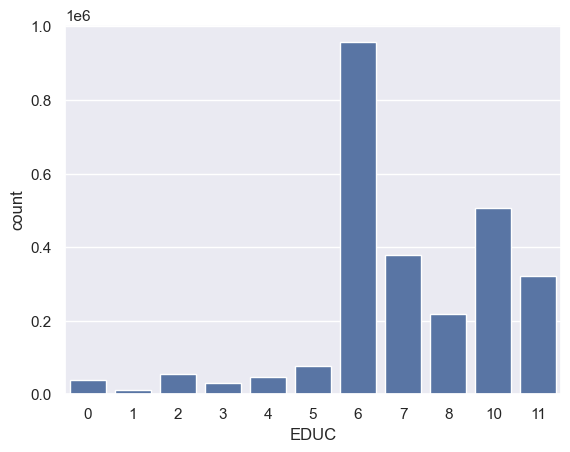

In [260]:
data = data[data['EDUC'] != 99]
sns.countplot(data=data, x='EDUC')

## Descriptive Statistics

In [261]:
# Display descriptive statistics for AGE
data['AGE'].agg(['mean','std','min','max','count'])

mean     4.993685e+01
std      1.923503e+01
min      1.700000e+01
max      9.600000e+01
count    2.638148e+06
Name: AGE, dtype: float64

In [262]:
# I don't think there is utility in running these descriptive statistics on coded variables but am leaving it for now
data['VETSTAT'].agg(['mean','std','min','max','count'])

mean     7.740809e-02
std      2.672379e-01
min      0.000000e+00
max      1.000000e+00
count    2.638148e+06
Name: VETSTAT, dtype: float64

In [263]:
data['EDUC'].agg(['mean','std','min','max','count'])

mean     7.395791e+00
std      2.408572e+00
min      0.000000e+00
max      1.100000e+01
count    2.638148e+06
Name: EDUC, dtype: float64

## Plots

Text(0.5, 1.0, 'Non-Veteran vs Veteran Status by Age')

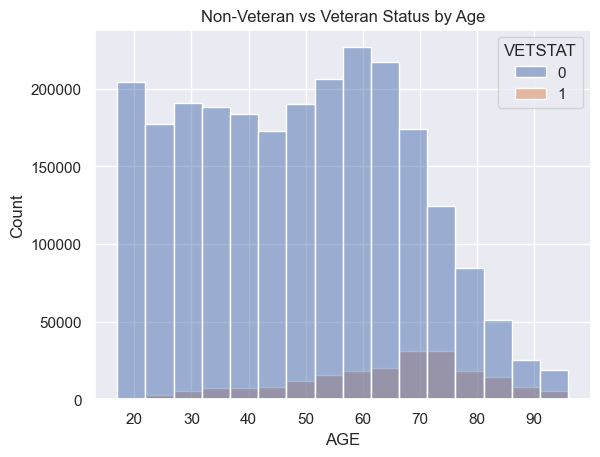

In [264]:
sns.histplot(data=data, x='AGE',hue='VETSTAT',binwidth=5).set_title('Non-Veteran vs Veteran Status by Age')

Text(0.5, 1.0, 'Veteran Status By Education Level Code')

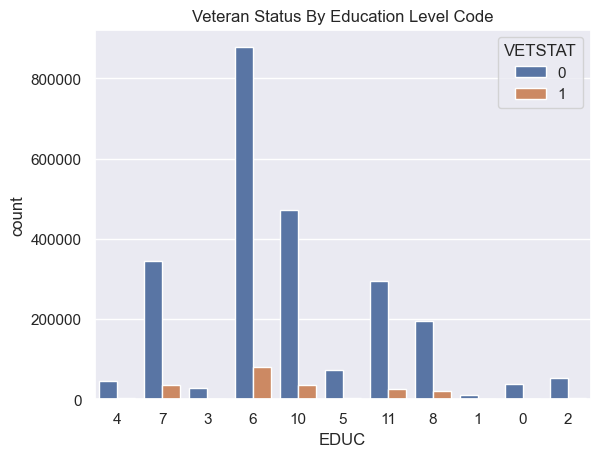

In [265]:
sns.countplot(data=data.astype(str), x='EDUC',hue="VETSTAT").set_title('Veteran Status By Education Level Code')

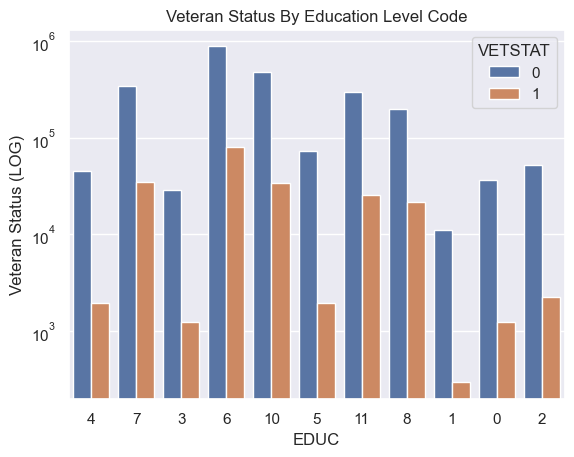

In [266]:
sns.countplot(data=data.astype(str), x='EDUC',hue="VETSTAT").set_title('Veteran Status By Education Level Code')
# Since veterans are a clear minority, we add a log scale to create more clarity
plt.ylabel("Veteran Status (LOG)")
plt.yscale('log')

In [267]:
data["VETSTAT"].value_counts()

VETSTAT
0    2433934
1     204214
Name: count, dtype: int64

In [268]:
# https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/
total = data[['EDUC','VETSTAT']].groupby(['EDUC','VETSTAT']).value_counts()
total

EDUC  VETSTAT
0     0           36893
      1            1244
1     0           11065
      1             295
2     0           51765
      1            2270
3     0           29073
      1            1241
4     0           45798
      1            1950
5     0           73699
      1            1958
6     0          877647
      1           79469
7     0          343569
      1           34532
8     0          196253
      1           21447
10    0          472869
      1           34373
11    0          295303
      1           25435
Name: count, dtype: int64

In [269]:
#total has a MultiIndex index we need to reset it
total = total.reset_index(level=[0,1]) # ["EDUC", "VETSTAT"] also works here
total

,EDUC,VETSTAT,count
0,0,0,36893
1,0,1,1244
2,1,0,11065
3,1,1,295
4,2,0,51765
5,2,1,2270
6,3,0,29073
7,3,1,1241
8,4,0,45798
9,4,1,1950


In [270]:
print(total[total["EDUC"] == 9]["count"].sum())
total[total["EDUC"] == 9]

0


,EDUC,VETSTAT,count


In [271]:
total["EDUC"].value_counts().index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11], dtype='int64', name='EDUC')

    EDUC  VETSTAT  count
1      0        1   1244
3      1        1    295
5      2        1   2270
7      3        1   1241
9      4        1   1950
11     5        1   1958
13     6        1  79469
15     7        1  34532
17     8        1  21447
19    10        1  34373
21    11        1  25435


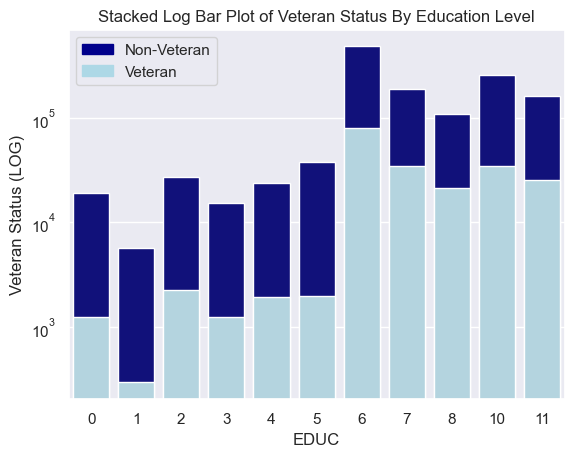

In [272]:
bar1 = sns.barplot(x='EDUC',y='count',data=total,color='darkblue',errorbar=None)
# Bottom bar
vet = total[total['VETSTAT']==1]

print(vet)
bar2 = sns.barplot(x='EDUC',y='count',data=vet,estimator=sum,errorbar=None,color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='Non-Veteran')
bottom_bar = mpatches.Patch(color='lightblue', label='Veteran')
plt.legend(handles=[top_bar,bottom_bar])

# show the graph
plt.title("Stacked Log Bar Plot of Veteran Status By Education Level")
plt.ylabel("Veteran Status (LOG)")
plt.yscale('log')
plt.show()

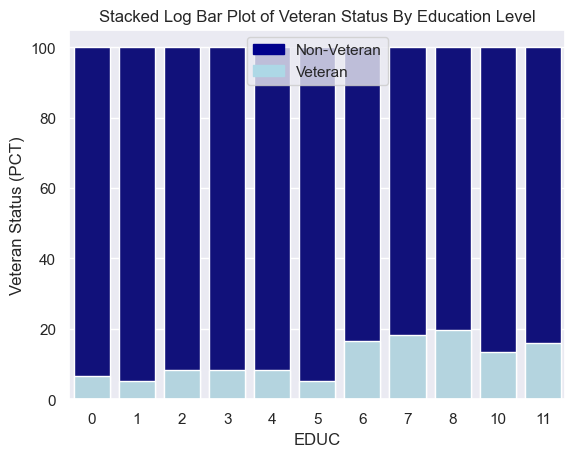

In [273]:
sns.set_theme(style="darkgrid")

# Create Percentage column
educ_total = []
for i in total["EDUC"].value_counts().index.to_list():
    cnt = total[total["EDUC"] == i]["count"].sum()
    for _ in range(2):
        educ_total.append(cnt)

total["PCT"] = total["count"] / pd.Series(educ_total) * 200

# Begin plotting
bar1 = sns.barplot(x='EDUC',y='PCT',data=total,color='darkblue',errorbar=None)
# Bottom bar
vet = total[total['VETSTAT']==1]

bar2 = sns.barplot(x='EDUC',y='PCT',data=vet,estimator=sum,errorbar=None,color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='Non-Veteran')
bottom_bar = mpatches.Patch(color='lightblue', label='Veteran')
plt.legend(handles=[top_bar,bottom_bar])

# show the graph
plt.title("Stacked Log Bar Plot of Veteran Status By Education Level")
plt.ylabel("Veteran Status (PCT)")

plt.show()

In [274]:
heatmap_df = total.pivot(index="VETSTAT",columns="EDUC",values="count")
heatmap_df

#.groupby(["VETSTAT"]).value_counts().unstack().T.reindex()

EDUC,0,1,2,3,4,5,6,7,8,10,11
VETSTAT,,,,,,,,,,,
0,36893,11065,51765,29073,45798,73699,877647,343569,196253,472869,295303
1,1244,295,2270,1241,1950,1958,79469,34532,21447,34373,25435


Text(0.5, 1.0, 'Education Heatmap by Veteran Status')

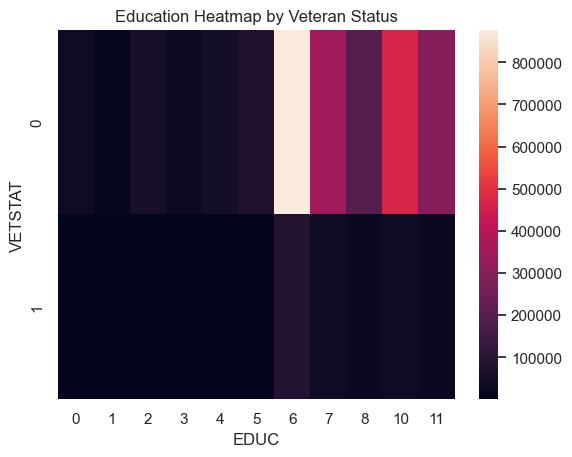

In [275]:
sns.heatmap(data = heatmap_df).set_title("Education Heatmap by Veteran Status")
# Might need to make this logarithmic as well